In [1]:
#Pandapower & other data processing stuff
import pandapower as pp
import pandapower.networks as pn
import pandas as pd
# import pandapower.toolbox as tb
# import pandapower.timeseries as ts
# import pandapower.control as control
# from pandapower.control.controller.const_control import ConstControl
# from pandapower.timeseries.data_sources.frame_data import DFData
# from pandapower.timeseries.output_writer import OutputWriter
# from pandapower.timeseries.run_time_series import run_timeseries
# from pandapower.control.basic_controller import Controller
#  import simbench as sb

import matplotlib.pyplot as plt
import numpy as np
import random


# import stable_baselines3 as sb3


In [34]:
import Scripts.grid_loader as gl
import pandapower as pp

# # load the grid for the environment
# grid = gl.load_test_case_grid(6, "ww")
# # grid = gl.load_test_case_grid(39)
# pp.runopp(grid)
grid = gl.load_test_case_grid(5)

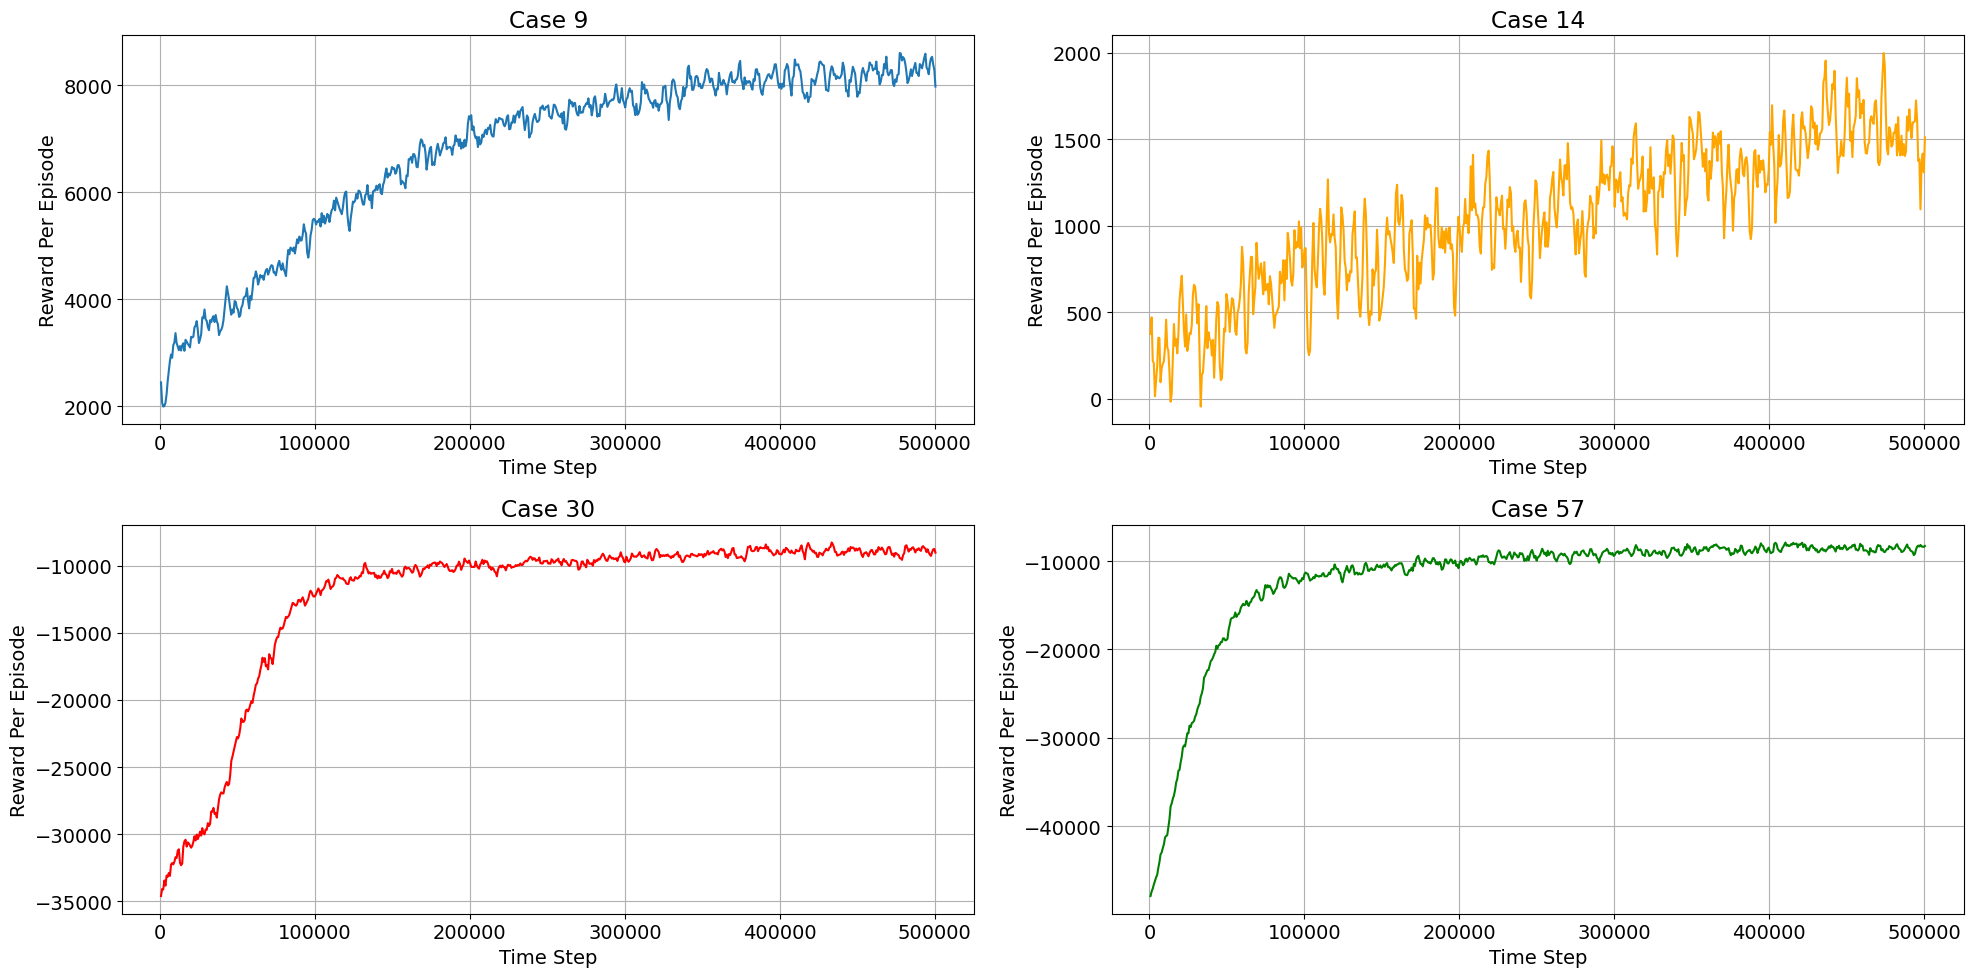

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_case9 = pd.read_json("Training/Logs/Logs_Case9_PPO_7.json")
df_case14 = pd.read_json("Training/Logs/Logs_Case14_PPO_1.json")
df_case30 = pd.read_json("Training/Logs/Logs_Case30_PPO_2.json")
df_case57 = pd.read_json("Training/Logs/Logs_Case57_PPO_1.json")

#rename the column 2
df_case9 = df_case9.rename(columns={2: 'Case 9'})
df_case14 = df_case14.rename(columns={2: 'Case 14'})
df_case30 = df_case30.rename(columns={2: 'Case 30'})
df_case57 = df_case57.rename(columns={2: 'Case 57'})

df_logs = pd.concat([df_case9, df_case14["Case 14"], df_case30["Case 30"], df_case57["Case 57"]], axis=1)
df_logs.head()

# plot four plots for each case with column 1 as x-axis
# colors = sns.color_palette()
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.lineplot(x=1, y='Case 9', data=df_logs, ax=axs[0, 0], label='Case 9')
sns.lineplot(x=1, y='Case 14', data=df_logs, ax=axs[0, 1], label='Case 14', color = "orange")
sns.lineplot(x=1, y='Case 30', data=df_logs, ax=axs[1, 0], label='Case 30', color = "red")
sns.lineplot(x=1, y='Case 57', data=df_logs, ax=axs[1, 1], label='Case 57', color="green")

for ax in axs.flat:
    ax.set(xlabel='Time Step', ylabel='Reward Per Episode')
    # set titile for each plot
    ax.set_title(ax.get_legend_handles_labels()[1][0])
    ax.grid()
    # do not show legend
    ax.get_legend().remove()
# make each plot less crowded
plt.tight_layout()
plt.rcParams.update({'font.size': 20})   
plt.show()


Text(0.5, 1.0, 'PPO Training')

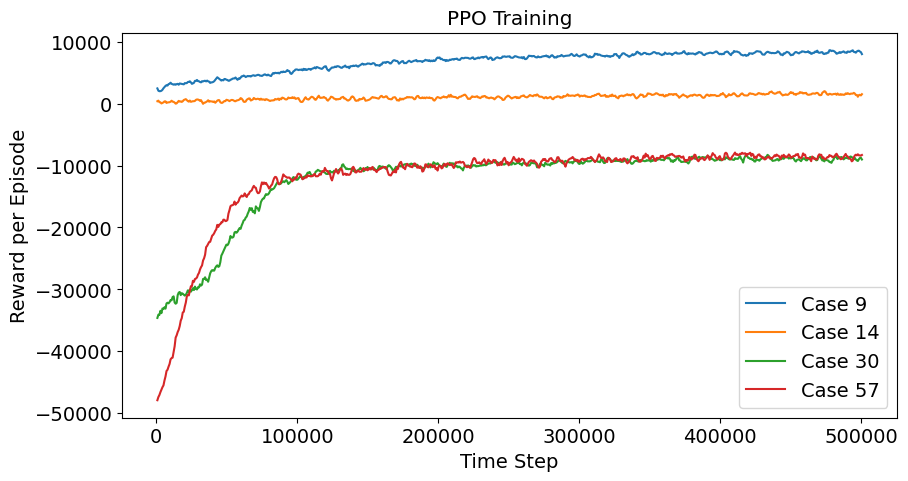

In [128]:


plt.figure(figsize=(10, 5))
sns.lineplot(data=df_logs, x=1, y='Case 9', label='Case 9')
sns.lineplot(data=df_logs, x=1, y='Case 14', label='Case 14')
sns.lineplot(data=df_logs, x=1, y='Case 30', label='Case 30')
sns.lineplot(data=df_logs, x=1, y='Case 57', label='Case 57')

plt.xlabel("Time Step")
plt.ylabel("Reward per Episode")

plt.rcParams.update({'font.size': 12})  
plt.title("PPO Training")

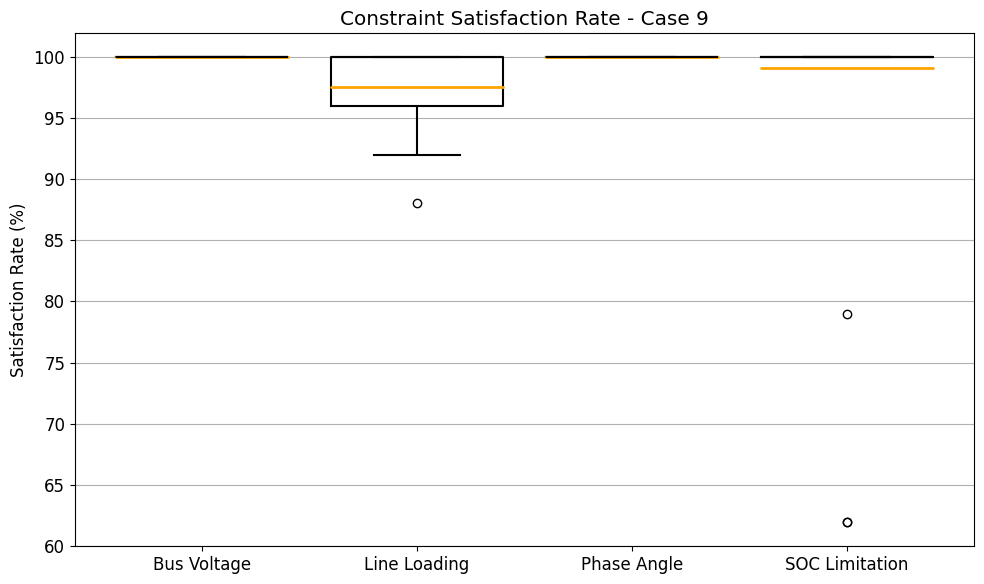

In [177]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

n_case = 9
with open(f"Evaluation/Case{n_case}/RL_metrics_Case{n_case}.pkl", 'rb') as f:
    dicts = pickle.load(f)

dicts

# drop the "Sample" key
dicts.pop("Sample")

# convert to dataframe
df = pd.DataFrame(dicts)
violation_cols = [col for col in df.columns if "violation" in col]

for col in violation_cols:
    df[col] = round((1-df[col]/24)*100)


# Calculate mean values
means = df[violation_cols].mean()


# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[violation_cols], fill=False, color='black')
# Add horizontal lines for mean values
for i, mean in enumerate(means):
    plt.hlines(mean, i - 0.4, i + 0.4, colors='orange', linewidth=2, label='Mean' if i == 0 else "")


plt.ylabel('Satisfaction Rate (%)')
plt.title(f'Constraint Satisfaction Rate - Case {n_case}')
plt.xticks(ticks=range(len(violation_cols)), labels=["Bus Voltage", "Line Loading", "Phase Angle", "SOC Limitation"]) #, rotation=45)
plt.yticks(range(60, 101, 5))
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

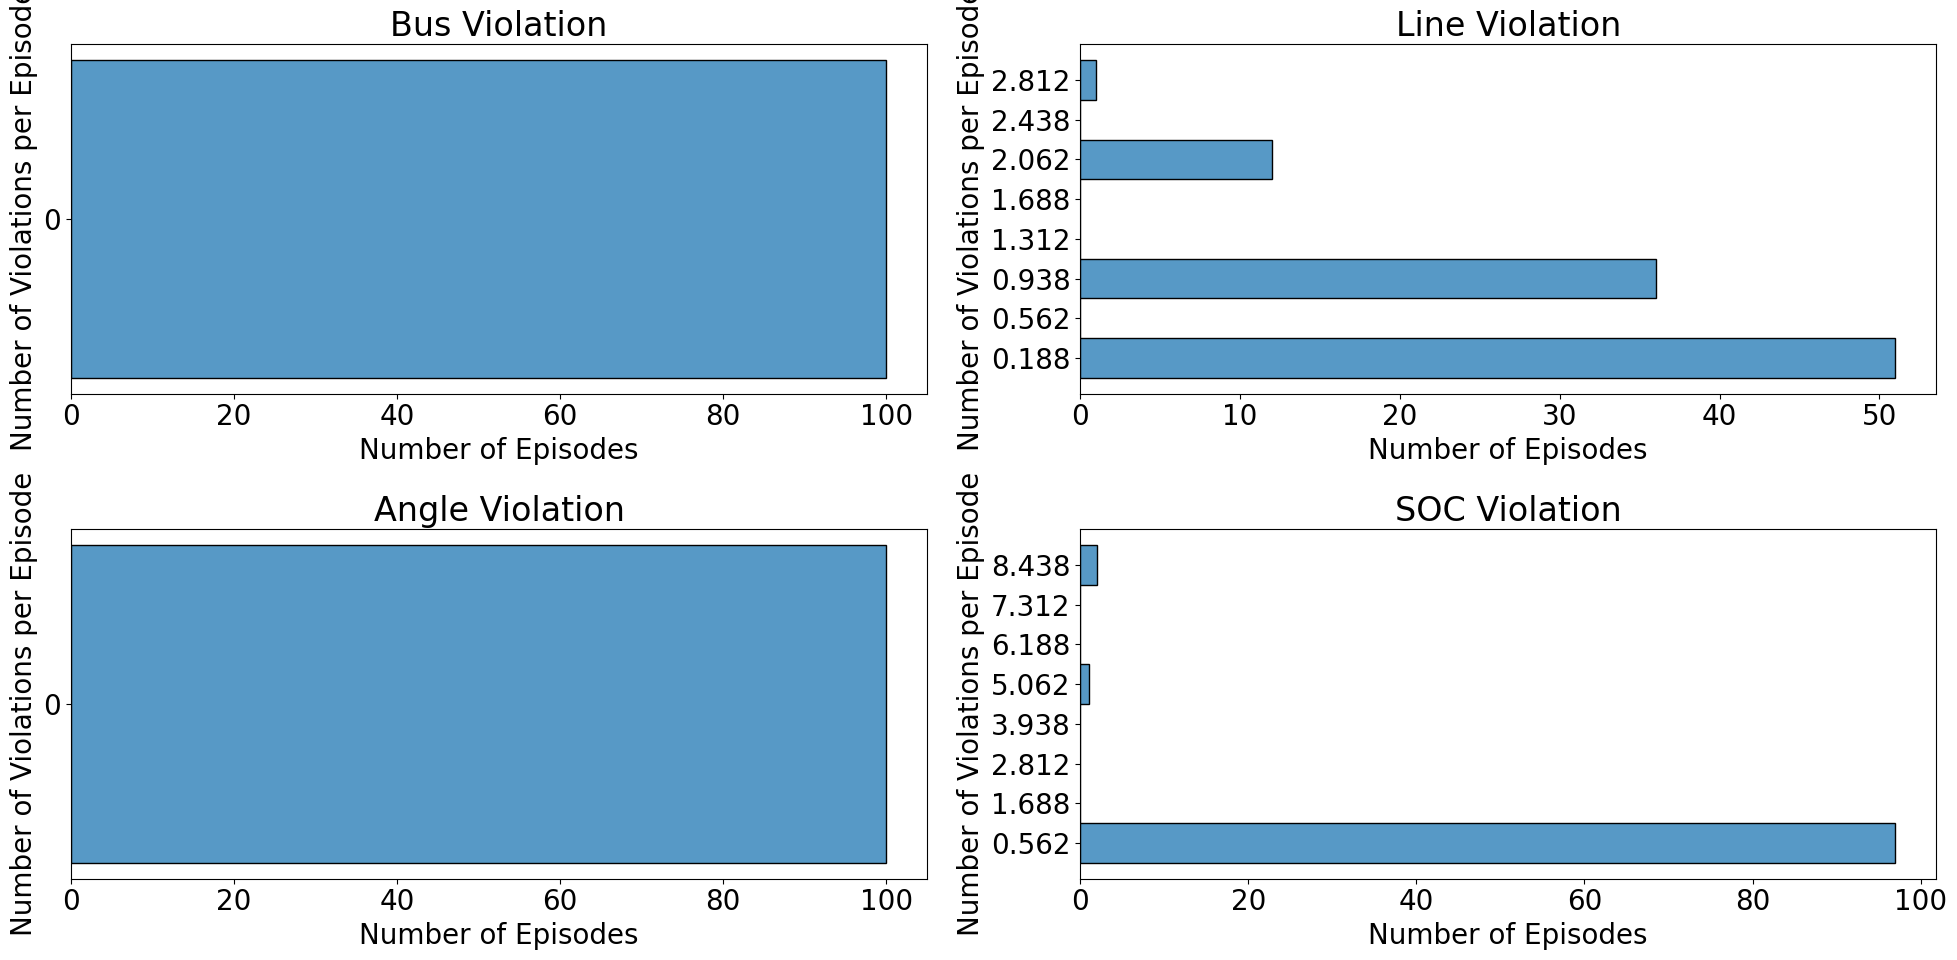

In [133]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

n_case = 9
with open(f"Evaluation/Case{n_case}/RL_metrics_Case{n_case}.pkl", 'rb') as f:
    dicts = pickle.load(f)

dicts

# drop the "Sample" key
dicts.pop("Sample")

# convert to dataframe
df = pd.DataFrame(dicts)
# df["N_bus_violations"] = round(df["N_bus_violations"], 2)
# df["N_line_violations"] = round(df["N_line_violations"], 2)
# df["N_angle_violations"] = round(df["N_angle_violations"], 2)
# df["N_SOC_violations"] = round(df["N_SOC_violations"], 2)

# plot distribution of N_bus_violations, N_line_violations, N_angle_violations, N_SOC_violations
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(y=df["N_bus_violations"],  ax=axs[0, 0], label="Bus Violation")
sns.histplot(y=df["N_line_violations"],  ax=axs[0, 1], label="Line Violation")
sns.histplot(y=df["N_angle_violations"],  ax=axs[1, 0], label="Angle Violation")
sns.histplot(y=df["N_SOC_violations"], ax=axs[1, 1], label="SOC Violation")

for ax in axs.flat:
    ax.set(ylabel='Number of Violations per Episode', xlabel='Number of Episodes')
    # set titile for each plot
    ax.set_title(ax.get_legend_handles_labels()[1][0])

    # Adjust y-ticks to be at the center of the bars
    if ax.patches:  # Ensure there are bars in the plot
        bin_centers = [patch.get_y() + patch.get_height() / 2 for patch in ax.patches]
        ax.set_yticks(bin_centers)

plt.tight_layout()
plt.rcParams.update({'font.size': 12})
plt.show()

Text(0, 0.5, 'Number of Episodes')

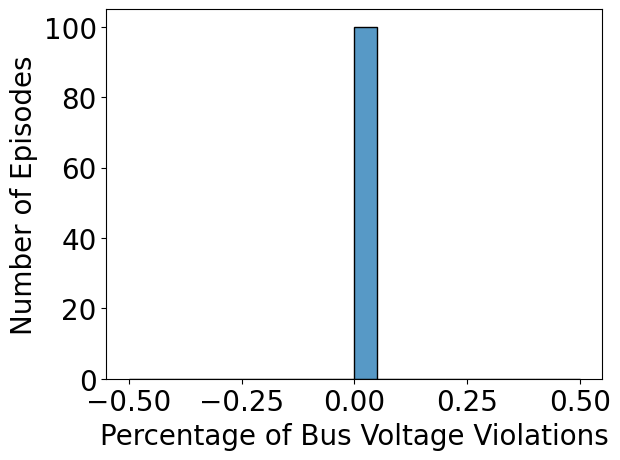

In [104]:
sns.histplot(data=df, x="N_bus_violations", bins=20)
plt.xlabel("Percentage of Bus Voltage Violations")
plt.ylabel("Number of Episodes")

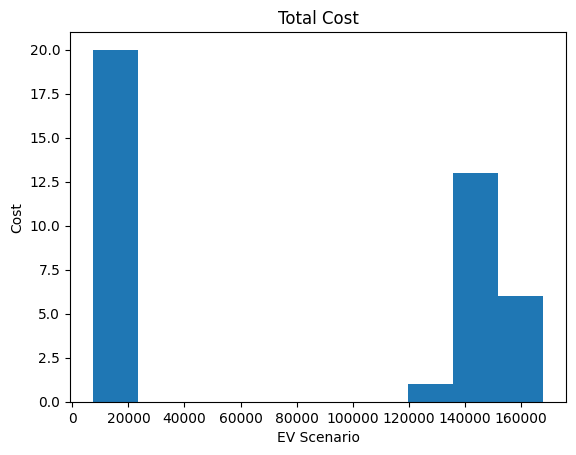

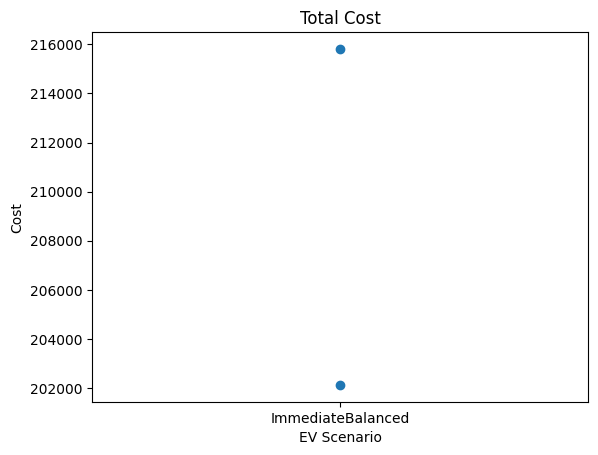

In [3]:
# Prepare data for scatter plot
x = []
y = []
for key in Costs.keys():
    x.extend([key] * len(Costs[key]))
    y.extend(Costs[key])

# Plot scatter plot
plt.figure()
plt.scatter(x, y)
plt.title("Total Cost")
plt.xlabel("EV Scenario")
plt.ylabel("Cost")
plt.show()


/Users/YANG_Chialing/Desktop/Master_Thesis_TUM/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/YANG_Chialing/Desktop/Master_Thesis_TUM/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


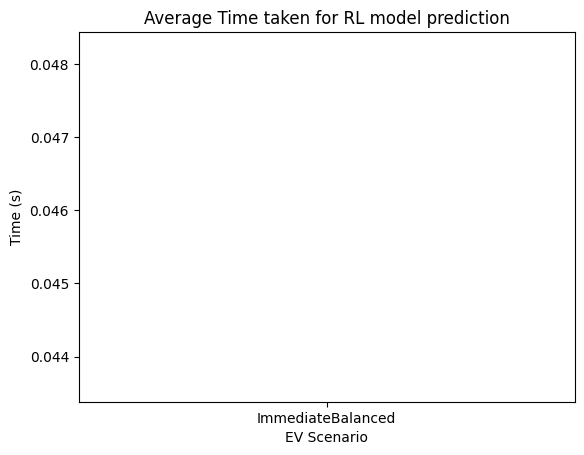

In [4]:
# Prepare data for line plot
x = []
y = []
for key in Time.keys():
    x.append(key)
    y.append(np.mean(Time[key]))

# Plot line plot
plt.figure()
plt.plot(x, y)
plt.title("Average Time taken for RL model prediction")
plt.xlabel("EV Scenario")
plt.ylabel("Time (s)")
plt.show()

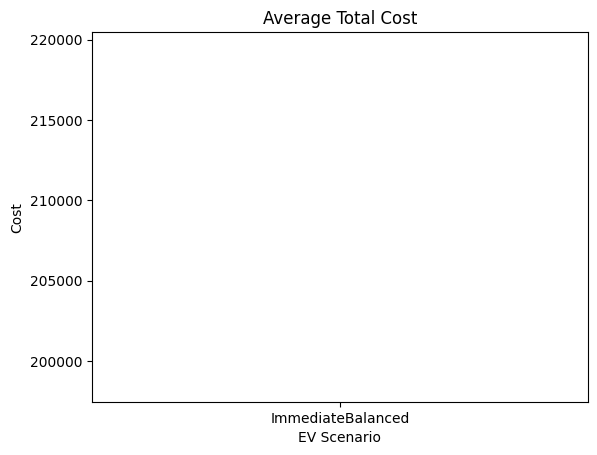

In [5]:
# Prepare data for line plot
x = []
y = []
for key in Costs.keys():
    x.append(key)
    y.append(np.mean(Costs[key]))

# Plot line plot
plt.figure()
plt.plot(x, y)
plt.title("Average Total Cost")
plt.xlabel("EV Scenario")
plt.ylabel("Cost")
plt.show()


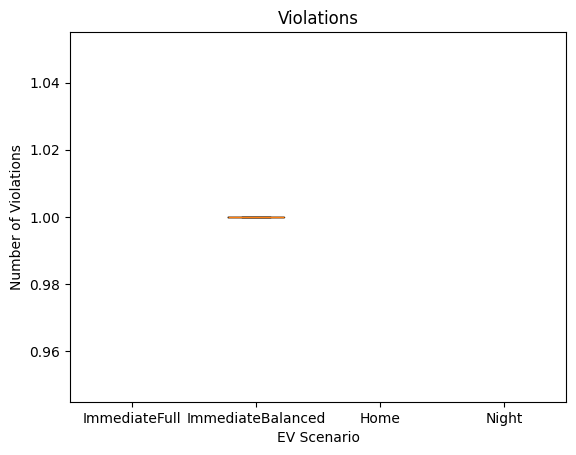

In [6]:
N_violations = dicts[2]
data = [N_violations[key] for key in N_violations.keys()]
plt.figure()
plt.boxplot(data, labels=N_violations.keys())
plt.title("Violations")
plt.xlabel("EV Scenario")
plt.ylabel("Number of Violations")
plt.show()

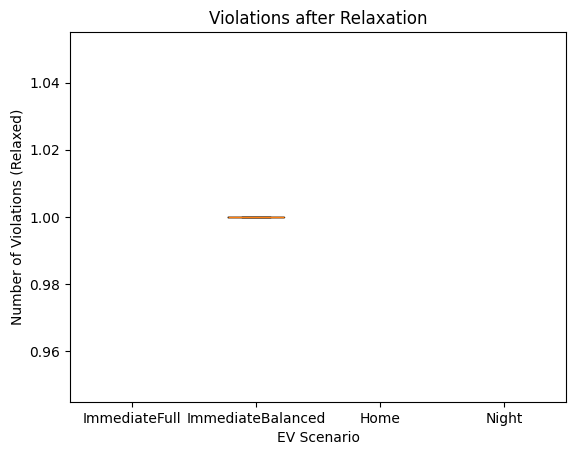

In [7]:
N_violations = dicts[3]
data = [N_violations[key] for key in N_violations.keys()]
plt.figure()
plt.boxplot(data, labels=N_violations.keys())
plt.title("Violations after Relaxation")
plt.xlabel("EV Scenario")
plt.ylabel("Number of Violations (Relaxed)")
plt.show()

Text(0, 0.5, '%')

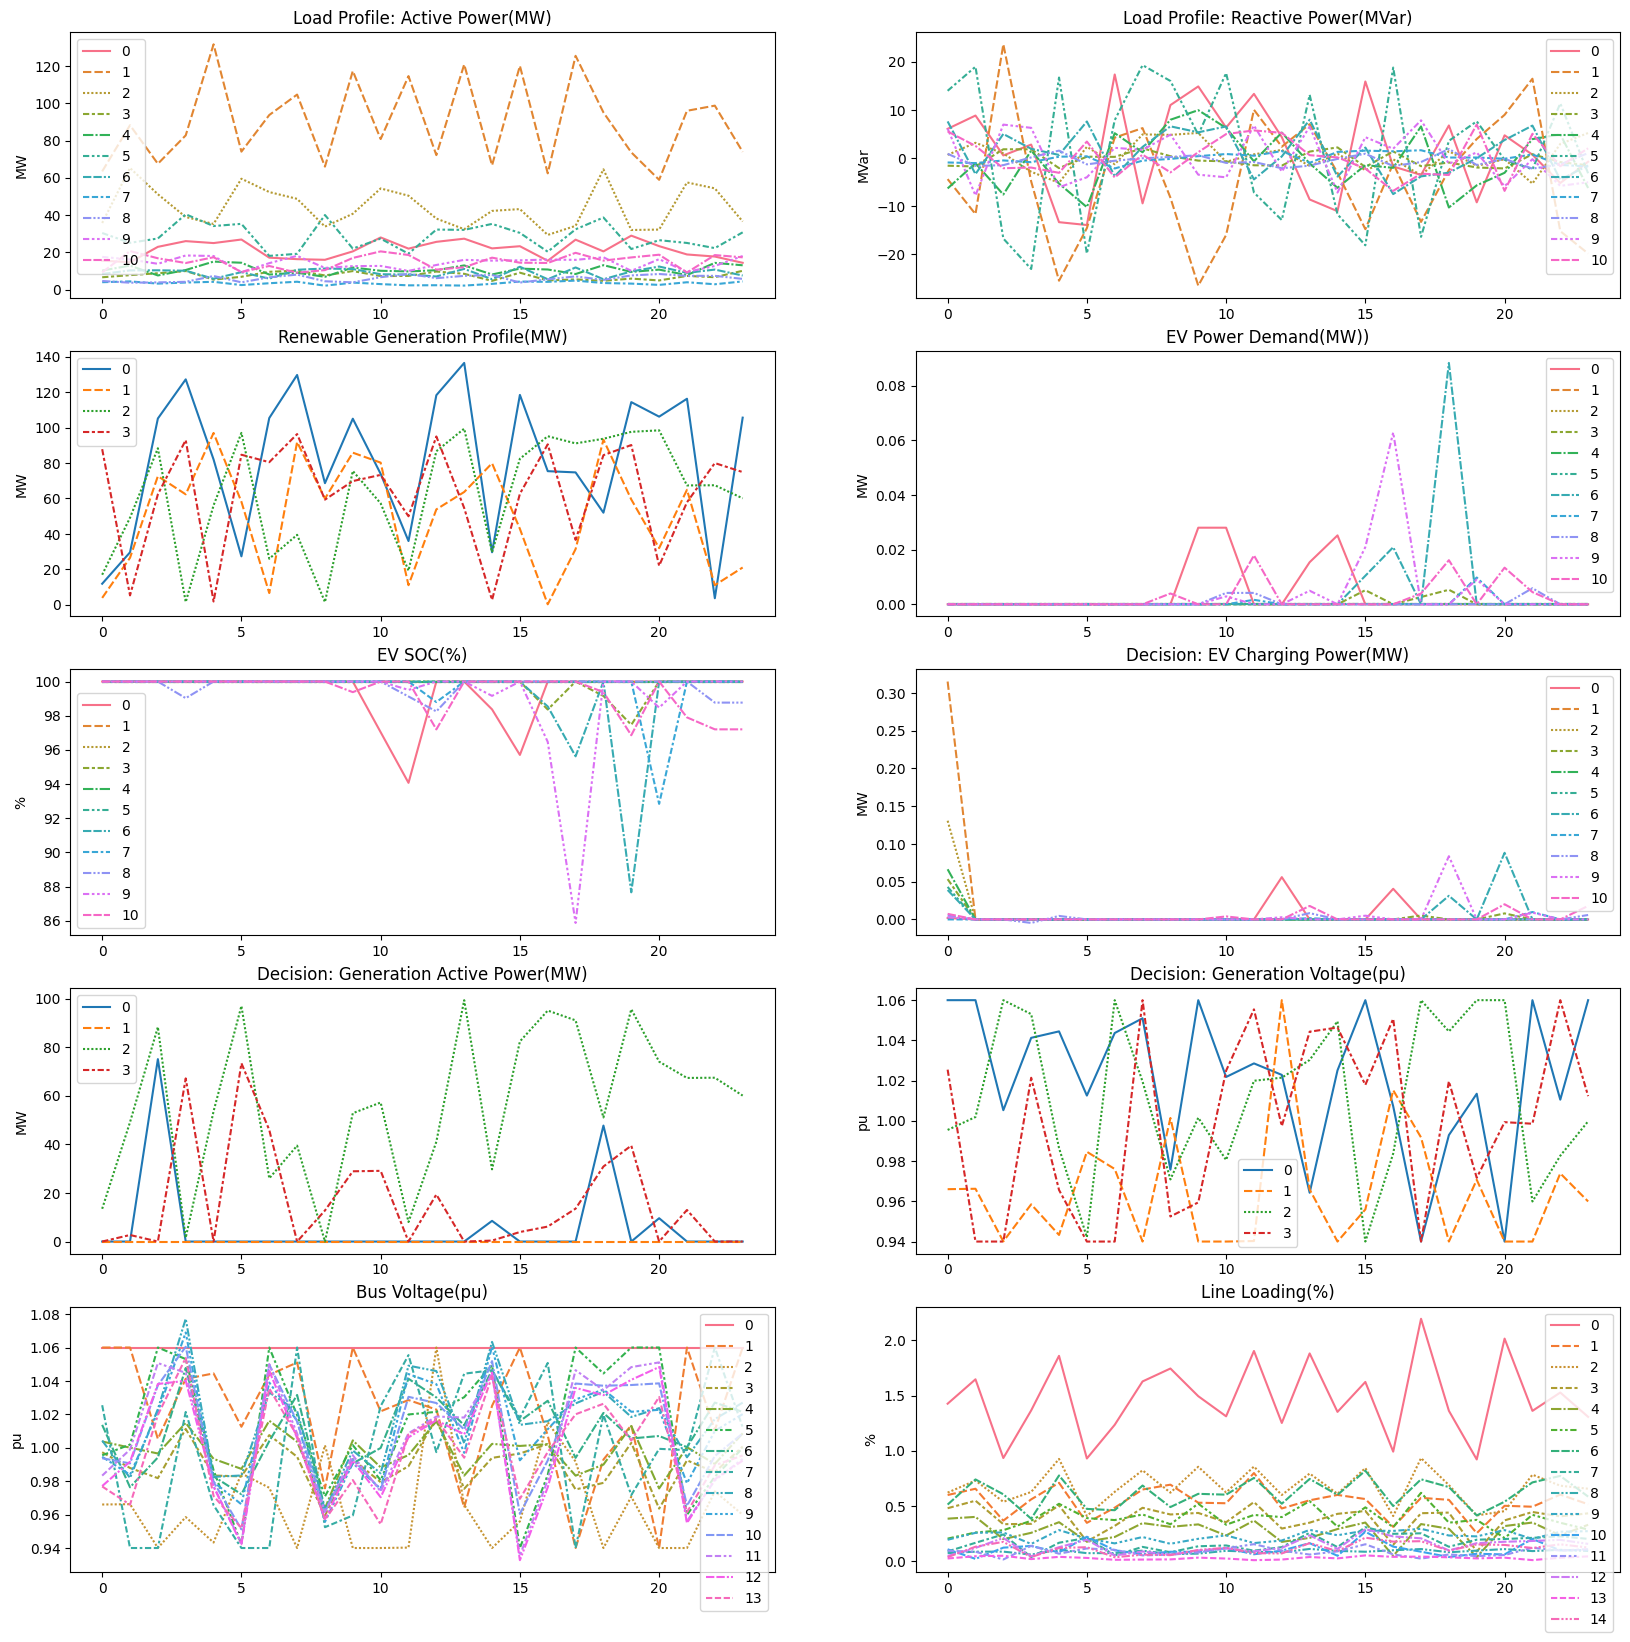

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

EVScenarios = ["ImmediateFull", "ImmediateBalanced", "Home", "Night"]
n_case = 14
i = EVScenarios[1]
df_load_p = pd.read_csv("Evaluation/Case%s/Case%s_%s/load_p.csv"%(n_case,n_case,i))
df_load_q = pd.read_csv("Evaluation/Case%s/Case%s_%s/load_q.csv"%(n_case,n_case,i))
df_renew = pd.read_csv("Evaluation/Case%s/Case%s_%s/renewable.csv"%(n_case,n_case,i))
df_ev_demand = pd.read_csv("Evaluation/Case%s/Case%s_%s/ev_demand.csv"%(n_case,n_case,i))
df_ev_soc = pd.read_csv("Evaluation/Case%s/Case%s_%s/ev_soc.csv"%(n_case,n_case,i))
df_gen_p = pd.read_csv("Evaluation/Case%s/Case%s_%s/gen_p.csv"%(n_case,n_case,i))
df_gen_v = pd.read_csv("Evaluation/Case%s/Case%s_%s/gen_v.csv"%(n_case,n_case,i))
df_ev_action = pd.read_csv("Evaluation/Case%s/Case%s_%s/ev_action.csv"%(n_case,n_case,i))
df_voltage = pd.read_csv("Evaluation/Case%s/Case%s_%s/voltage.csv"%(n_case,n_case,i))
df_line_loading = pd.read_csv("Evaluation/Case%s/Case%s_%s/line_loading.csv"%(n_case,n_case,i))

#define plotting region (5 rows, 5 columns)
fig, axes = plt.subplots(5, 2,figsize=(20,20))
sns.lineplot(data=df_load_p, ax=axes[0,0])
sns.lineplot(data=df_load_q, ax=axes[0,1])
sns.lineplot(data=df_renew, ax=axes[1,0])
sns.lineplot(data=df_ev_demand, ax=axes[1,1])
sns.lineplot(data=df_ev_soc *100, ax=axes[2,0])
sns.lineplot(data=df_ev_action, ax=axes[2,1])
sns.lineplot(data=df_gen_p, ax=axes[3,0])
sns.lineplot(data=df_gen_v, ax=axes[3,1])
sns.lineplot(data=df_voltage, ax=axes[4,0])
sns.lineplot(data=df_line_loading, ax=axes[4,1])

axes[0,0].set_title("Load Profile: Active Power(MW)")
axes[0,1].set_title("Load Profile: Reactive Power(MVar)")
axes[1,0].set_title("Renewable Generation Profile(MW)")
axes[1,1].set_title("EV Power Demand(MW))")
axes[2,0].set_title("EV SOC(%)")
axes[2,1].set_title("Decision: EV Charging Power(MW)")
axes[3,0].set_title("Decision: Generation Active Power(MW)")
axes[3,1].set_title("Decision: Generation Voltage(pu)")
axes[4,0].set_title("Bus Voltage(pu)")
axes[4,1].set_title("Line Loading(%)")


# axes.set_xlabel("Hour")
axes[0,0].set_ylabel("MW")
axes[0,1].set_ylabel("MVar")
axes[1,0].set_ylabel("MW")
axes[1,1].set_ylabel("MW")
axes[2,0].set_ylabel("%")
axes[2,1].set_ylabel("MW")
axes[3,0].set_ylabel("MW")
axes[3,1].set_ylabel("pu")
axes[4,0].set_ylabel("pu")
axes[4,1].set_ylabel("%")

In [7]:
df = pd.read_csv("Data/German_EV/emobpy_timeseries_hourly.csv")
df.head()

/var/folders/w4/7lpv40nd2g79_r3by73bjd7c0000gn/T/ipykernel_11924/3384518554.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/German_EV/emobpy_timeseries_hourly.csv")


,Unnamed: 0,ID,VehicleMobility,DrivingConsumption,GridAvailability,GridDemand_Immediate_full_capacity,GridDemand_Immediate_full_capacity.1,GridDemand_Immediate_balanced,GridDemand_Immediate_balanced.1,GridDemand_From_0_to_24_at_home,GridDemand_From_0_to_24_at_home.1,GridDemand_From_23_to_8_at_home,GridDemand_From_23_to_8_at_home.1
0,NaN,ID,Distance_km,Consumption_kWh,PowerRating_kW,Load_kW,SoC,Load_kW,SoC,Load_kW,SoC,Load_kW,SoC
1,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:00:00,0.0,0.0,0.0,3.7,3.7,0.546,0.426,0.50525,0.426,0.50525,0.426,0.50525
3,2020-01-01 01:00:00,0.0,0.0,0.0,3.7,3.7,0.62,0.426,0.514,0.426,0.514,0.426,0.514
4,2020-01-01 02:00:00,0.0,0.0,0.0,3.7,3.7,0.694,0.426,0.5222500000000001,0.426,0.5222500000000001,0.426,0.5222500000000001


In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'VehicleMobility', 'DrivingConsumption',
       'GridAvailability', 'GridDemand_Immediate_full_capacity',
       'GridDemand_Immediate_full_capacity.1', 'GridDemand_Immediate_balanced',
       'GridDemand_Immediate_balanced.1', 'GridDemand_From_0_to_24_at_home',
       'GridDemand_From_0_to_24_at_home.1', 'GridDemand_From_23_to_8_at_home',
       'GridDemand_From_23_to_8_at_home.1'],
      dtype='object')

In [5]:
# df = pd.read_csv("../Data/German_EV/emobpy_timeseries_original.csv")
# Modify column names by appending the content of the first row
new_column_names = [f"{col}_{df.at[0, col]}" for col in df.columns]

# Assign the new column names to the DataFrame
df.columns = new_column_names

# Drop the first and second rows
df = df.drop([0, 1]).reset_index(drop=True)

# Define a conversion function to convert values into float or int
def convert_to_float_int(value):
    try:
        # Try to convert to float
        float_val = float(value)
        # If the float value is equivalent to an int, return as int
        if float_val.is_integer():
            return int(float_val)
        else:
            return float_val
    except ValueError:
        # Return the original value if conversion fails
        return value

# Apply the conversion function to each element in the DataFrame
df = df.map(convert_to_float_int)
df = df.rename(columns={"Unnamed: 0_nan":"Time", 
                        "ID_ID":"ID",
                        "VehicleMobility_Location":"Location",
                        "VehicleMobility.1_Distance_km":"Distance_km", 
                        "DrivingConsumption_Consumption_kWh":"DrivingConsumption_kWh",
                        "GridAvailability_ChargingStation":"ChargingStation",
                        "GridAvailability.1_PowerRating_kW":"ChargingAvailability_kW",
                        "GridDemand_Immediate_full_capacity_Load_kW":"ChargingPowerImmediateFull_kW",
                        "GridDemand_Immediate_full_capacity.1_SoC":"SOCImmediateFull",
                        "GridDemand_Immediate_balanced_Load_kW":"ChargingPowerImmediateBalanced_kW",
                        "GridDemand_Immediate_balanced.1_SoC":"SOCImmediateBalanced",
                        "GridDemand_From_0_to_24_at_home_Load_kW":"ChargingPowerHome_kW",
                        "GridDemand_From_0_to_24_at_home.1_SoC":"SOCHome",
                        "GridDemand_From_23_to_8_at_home_Load_kW":"ChargingPowerNight_kW",
                        "GridDemand_From_23_to_8_at_home.1_SoC":"SOCNight"})
# df = df[df["ID"] < net.load.index.size]
df = df[df["ID"] < 11]
df['Time'] = pd.to_datetime(df['Time'])
df["Time_step"] = (df['Time'].astype('int64') - df['Time'].astype('int64').min()) // (3600 * 10**9)

NameError: name 'df' is not defined

In [ ]:
df_multiIndexed = df.set_index(['ID', 'Time_step'])
df_multiIndexed

Time  VehicleMobility_Distance_km  \
ID Time_step                                                    
0  0         2020-01-01 00:00:00                          0.0   
   1         2020-01-01 01:00:00                          0.0   
   2         2020-01-01 02:00:00                          0.0   
   3         2020-01-01 03:00:00                          0.0   
   4         2020-01-01 04:00:00                          0.0   
...                          ...                          ...   
10 8755      2020-12-30 19:00:00                          0.0   
   8756      2020-12-30 20:00:00                          0.0   
   8757      2020-12-30 21:00:00                          0.0   
   8758      2020-12-30 22:00:00                          0.0   
   8759      2020-12-30 23:00:00                          0.0   

              DrivingConsumption_kWh  GridAvailability_PowerRating_kW  \
ID Time_step                                                            
0  0                             0.0                              3.7   
   1                             0.0                              3.7   
   2                             0.0                              3.7   
   3                             0.0                              3.7   
   4                             0.0                              3.7   
...                              ...                              ...   
10 8755                          0.0                              3.7   
   8756                          0.0                              3.7   
   8757                          0.0                              3.7   
   8758                          0.0                              3.7   
   8759                          0.0                              3.7   

              ChargingPowerImmediateFull_kW  SOCImmediateFull  \
ID Time_step                                                    
0  0                                    3.7             0.546   
   1                                    3.7             0.620   
   2                                    3.7             0.694   
   3                                    3.7             0.768   
   4                                    3.7             0.842   
...                                     ...               ...   
10 8755                                 0.0             1.000   
   8756                                 0.0             1.000   
   8757                                 0.0             1.000   
   8758                                 0.0             1.000   
   8759                                 0.0             1.000   

              ChargingPowerImmediateBalanced_kW  SOCImmediateBalanced  \
ID Time_step                                                            
0  0                                      0.426               0.50525   
   1                                      0.426               0.51400   
   2                                      0.426               0.52225   
   3                                      0.426               0.53100   
   4                                      0.426               0.53925   
...                                         ...                   ...   
10 8755                                   0.867               0.92525   
   8756                                   0.867               0.94225   
   8757                                   0.867               0.95950   
   8758                                   0.867               0.97650   
   8759                                   0.867               0.99350   

              ChargingPowerHome_kW  SOCHome  ChargingPowerNight_kW  SOCNight  
ID Time_step                                                                  
0  0                         0.426  0.50525                  0.426   0.50525  
   1                         0.426  0.51400                  0.426   0.51400  
   2                         0.426  0.52225                  0.426   0.52225  
   3                         0.426  0.531

In [4]:
def convertTuple(tup):
    str = '_'.join(tup)
    return str
for i in profiles.keys():
    a = convertTuple(i)
    if a == 'load_p_mw':
        load_pmw = profiles[i]
    elif a == 'load_q_mvar':
        load_qmvar = profiles[i]

Text(0, 0.5, '%')

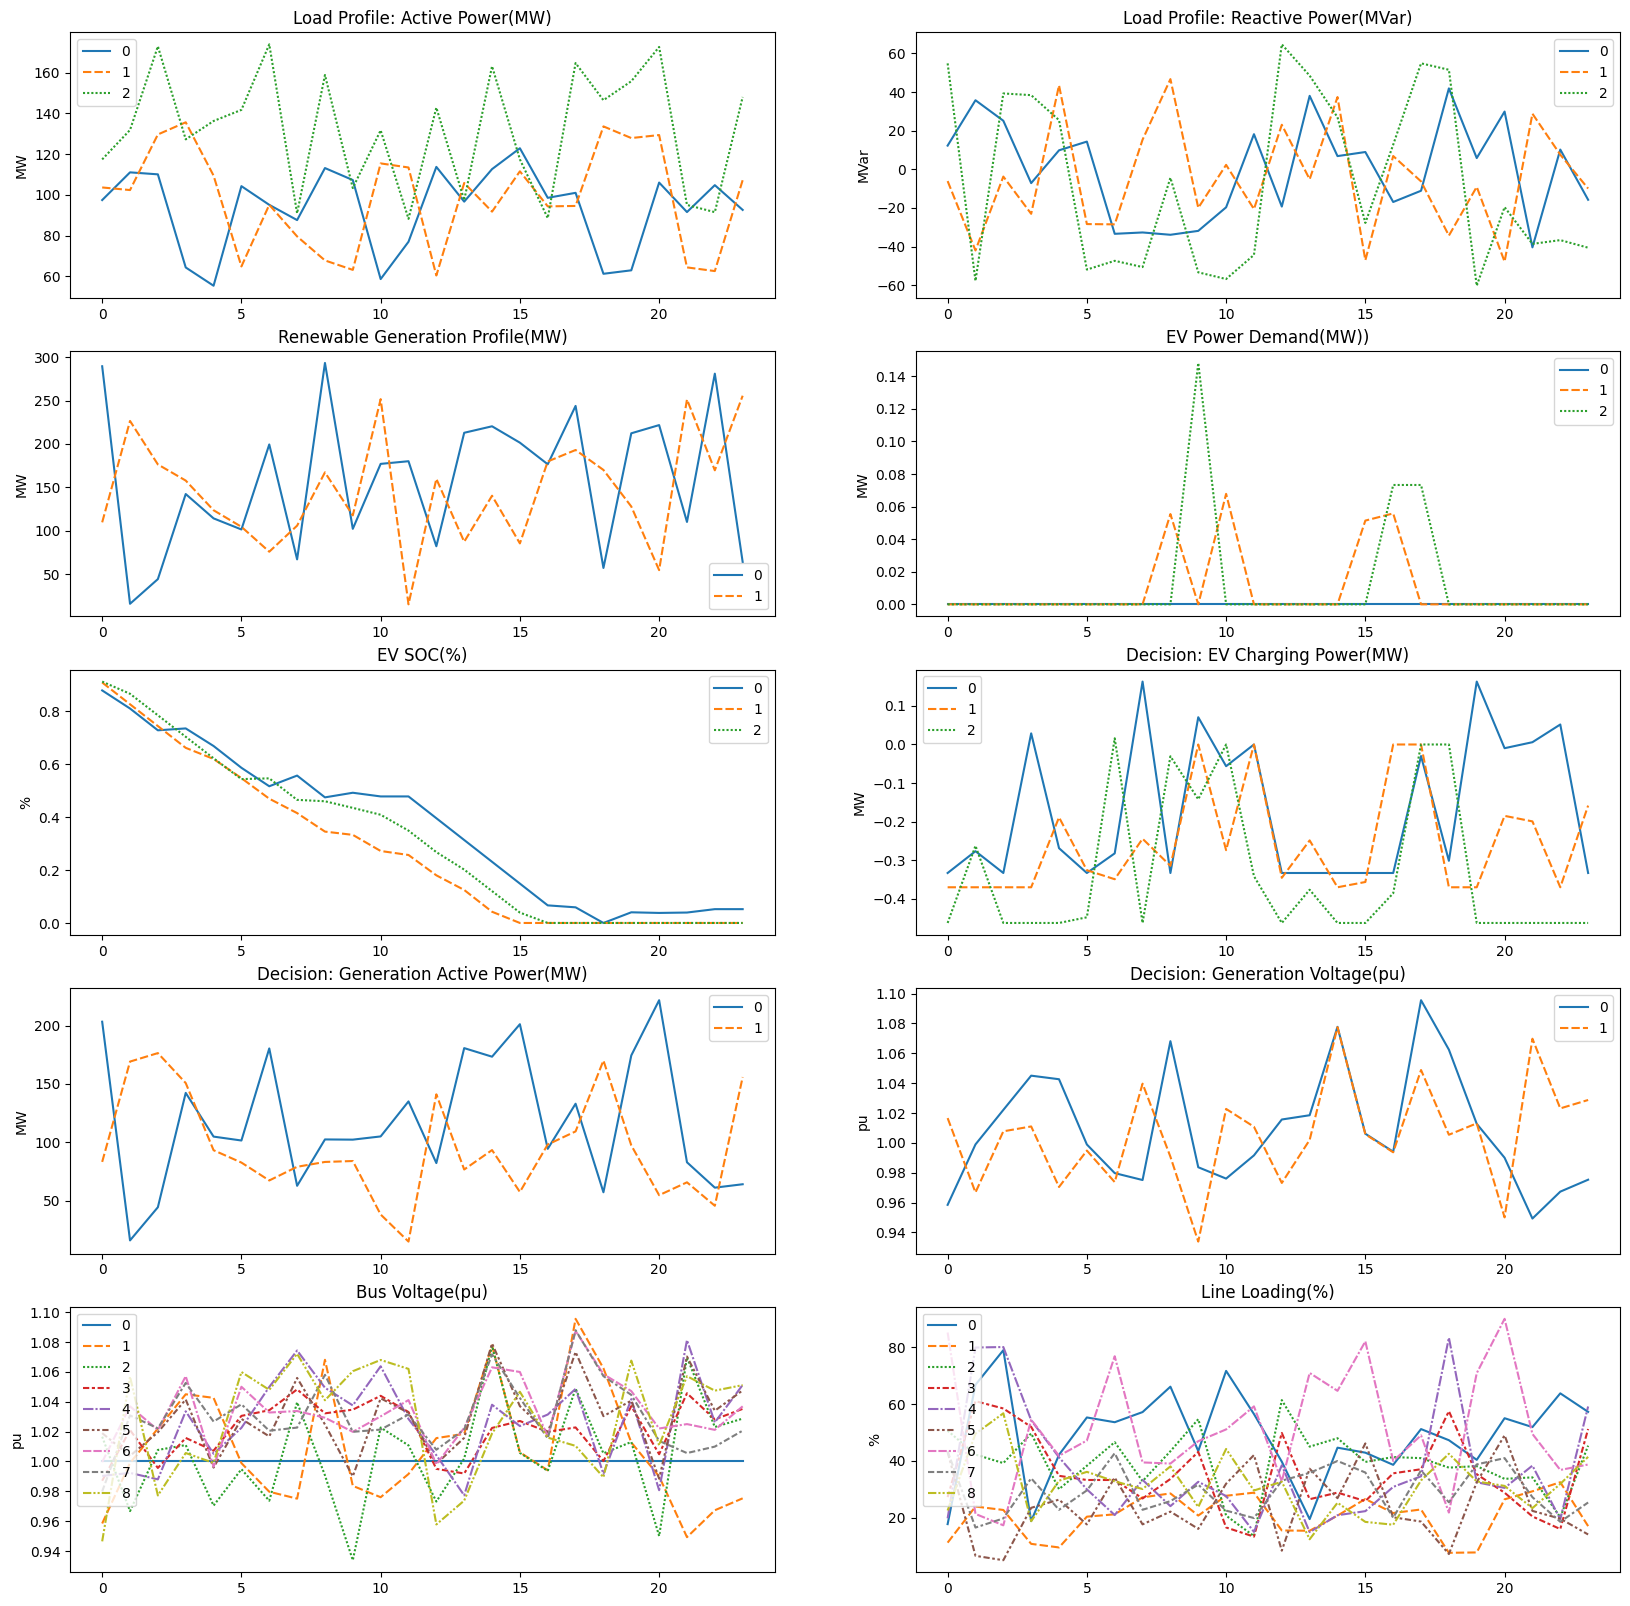

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

n_case = 9
df_load_p = pd.read_csv("Evaluation/Case%s/load_p.csv"%(n_case))
df_load_q = pd.read_csv("Evaluation/Case%s/load_q.csv"%(n_case))
df_renew = pd.read_csv("Evaluation/Case%s/renewable.csv"%(n_case))
df_ev_demand = pd.read_csv("Evaluation/Case%s/ev_demand.csv"%(n_case))
df_ev_soc = pd.read_csv("Evaluation/Case%s/ev_soc.csv"%(n_case))
df_gen_p = pd.read_csv("Evaluation/Case%s/gen_p.csv"%(n_case))
df_gen_v = pd.read_csv("Evaluation/Case%s/gen_v.csv"%(n_case))
df_ev_action = pd.read_csv("Evaluation/Case%s/ev_action.csv"%(n_case))
df_voltage = pd.read_csv("Evaluation/Case%s/voltage.csv"%(n_case))
df_line_loading = pd.read_csv("Evaluation/Case%s/line_loading.csv"%(n_case))

#define plotting region (5 rows, 5 columns)
fig, axes = plt.subplots(5, 2,figsize=(20,20))
sns.lineplot(data=df_load_p, ax=axes[0,0])
sns.lineplot(data=df_load_q, ax=axes[0,1])
sns.lineplot(data=df_renew, ax=axes[1,0])
sns.lineplot(data=df_ev_demand, ax=axes[1,1])
sns.lineplot(data=df_ev_soc, ax=axes[2,0])
sns.lineplot(data=df_ev_action, ax=axes[2,1])
sns.lineplot(data=df_gen_p, ax=axes[3,0])
sns.lineplot(data=df_gen_v, ax=axes[3,1])
sns.lineplot(data=df_voltage, ax=axes[4,0])
sns.lineplot(data=df_line_loading, ax=axes[4,1])

axes[0,0].set_title("Load Profile: Active Power(MW)")
axes[0,1].set_title("Load Profile: Reactive Power(MVar)")
axes[1,0].set_title("Renewable Generation Profile(MW)")
axes[1,1].set_title("EV Power Demand(MW))")
axes[2,0].set_title("EV SOC(%)")
axes[2,1].set_title("Decision: EV Charging Power(MW)")
axes[3,0].set_title("Decision: Generation Active Power(MW)")
axes[3,1].set_title("Decision: Generation Voltage(pu)")
axes[4,0].set_title("Bus Voltage(pu)")
axes[4,1].set_title("Line Loading(%)")


# axes.set_xlabel("Hour")
axes[0,0].set_ylabel("MW")
axes[0,1].set_ylabel("MVar")
axes[1,0].set_ylabel("MW")
axes[1,1].set_ylabel("MW")
axes[2,0].set_ylabel("%")
axes[2,1].set_ylabel("MW")
axes[3,0].set_ylabel("MW")
axes[3,1].set_ylabel("pu")
axes[4,0].set_ylabel("pu")
axes[4,1].set_ylabel("%")